# Solar Power

## Business Understanding

### Stakeholder:
- 
-
- https://www.eia.gov/energyexplained/electricity/electricity-in-the-us.php

### True Business Problem:
With a recent push for cleaner renewable energy (company name) is seeing an increase in solar panel request. (company name) is looking the potential of solar power and how it can meet the demands of the current power consumption. 

# Data Understanding

In [2]:
# imports
import pandas as pd
import numpy as np
import requests 

from datetime import datetime as dt
from secret import keys
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Data was pulled from `https://www.eia.gov/opendata/index.php`
- In previous notebooks it was shown that I pulled in the data and created a master dataframe. From there I pulled the data down to my `data` folder within my `projects` and will use that as the source of my data.
- I originally used `parameters` to pull in the data from the website, which were:
    - `'api_key': api_key`,
    - `"frequency": "hourly"`, is pulling data in hourly.
    - `"data[]": "value"`, is the amount of energy produced
    - `"facets[fueltype][]":["SUN", "NG", "OIL"]`, energy source 
    - `"facets[respondent][]": "SOCO"`, recording location of data (Southern Company)
    - `"start": "2021-07-01"`, Time frame to pull data (start and end date)
    - `"end": "2022-07-29"`,
    - `"offset"`: 0
- Next, I assigned the data to list, requested the response from the website while using the above `parameters`, and assigned it to a dataframe.
    - dfs = []
    - for off in range(0, 30000, 5000):
        - params["offset"] = off
        - resp = requests.get(base_url, params=params)
        - data = resp.json()
        - df = pd.DataFrame(data['response']['data'])
        - dfs.append(df)
- Finally, I assigned the index, picked the columns that would be kept, and the target column `value`
    - df2 = pd.pivot(data=pd.concat(dfs), index='period', columns='fueltype', values='value')
- Side note: all seven notebooks were pulled down from the same website using the same parameters and process. There were a few tweaks made to certain codes to allow for specific data to be pulled in. 
    - I am using seven different dataframes because pulling the data in as one from the website created `NAN` in places were data was present. Separating the data allowed for all the necessary data to be acquired with not `NAN`.

In [3]:
!ls ../data

df2.csv
df_dem.csv
df_hydro.csv
df_nuc.csv
df_oil.csv
df_oth.csv
df_wind.csv


In [4]:
df = pd.read_csv('../data/df2.csv')
df.head(2)

,period,NG,OIL,SUN
0,2021-07-01 00:00:00,20540,-1,177
1,2021-07-01 01:00:00,19923,0,32


In [5]:
df_dem = pd.read_csv('../data/df_dem.csv')
df_dem.head(2)

,Unnamed: 0,period,value
0,0,2021-07-01T00,36125
1,1,2021-07-01T01,34645


In [6]:
df_hydro = pd.read_csv('../data/df_hydro.csv')
df_hydro.head(2)

,Unnamed: 0,period,value
0,0,2021-07-01T00,1900
1,1,2021-07-01T01,1202


In [7]:
df_nuc = pd.read_csv('../data/df_nuc.csv')
df_nuc.head(2)

,Unnamed: 0,period,value
0,0,2021-07-01T00,5376
1,1,2021-07-01T01,5372


In [8]:
df_wind = pd.read_csv('../data/df_wind.csv')
df_wind.head(2)

,Unnamed: 0,period,value
0,0,2021-07-01T00,0
1,1,2021-07-01T01,0


In [9]:
df_oth = pd.read_csv('../data/df_oth.csv')
df_oth.head(2)

,Unnamed: 0,period,value
0,0,2021-07-01T00,366
1,1,2021-07-01T01,373


## Datetime, Index, and Resample
- Below, a `datetime` will be created and will be assigned as the `index`
- `Datetime` will make it easier to read time read timeseries plots.
- The data will resample from hourly to daily to inspect how the data behaves under a different frequency.
#### Natural Gas, Oil, Sun

In [10]:
df['period'] = pd.to_datetime(df['period'])

In [11]:
df = df.set_index('period')
df = df.resample('D').sum()
df.head()

,NG,OIL,SUN
period,,,
2021-07-01,393574,-12,16579
2021-07-02,370842,-10,11408
2021-07-03,331165,-15,18091
2021-07-04,312014,-15,20093
2021-07-05,350574,8,15702


Create separate dataframes for the target columns

In [12]:
df_gas = df['NG']
df_gas.head(2)

period
2021-07-01    393574
2021-07-02    370842
Freq: D, Name: NG, dtype: int64

In [13]:
df_oil = df['OIL']
df_oil.head(2)

period
2021-07-01   -12
2021-07-02   -10
Freq: D, Name: OIL, dtype: int64

In [14]:
df_sun = df['SUN']
df_sun.head(2)

period
2021-07-01    16579
2021-07-02    11408
Freq: D, Name: SUN, dtype: int64

#### Hydro

In [15]:
# when imported the original row number was imported because of that I am pulling 
                                   # the columns that I need and dropping the rest.
df_hydro = df_hydro[['period', 'value']]

# Making the period (contains the date and time by hour) into a datetime column for forecasting purposes
df_hydro['period'] = pd.to_datetime(df_hydro['period'])

# Setting the new datetime column('period') as the index.
df_hydro = df_hydro.set_index('period')

# Sampling the hourly data into daily data. 
df_hydro = df_hydro.resample('D').sum()

df_hydro.head(2)

# This process will be repeated for the remaining dataframes.

,value
period,
2021-07-01,25886
2021-07-02,27973


#### Nuclear

In [16]:
df_nuc = df_nuc[['period', 'value']]

df_nuc['period'] = pd.to_datetime(df_nuc['period'])

df_nuc = df_nuc.set_index('period')

df_nuc = df_nuc.resample('D').sum()

df_nuc.head(2)

,value
period,
2021-07-01,121935
2021-07-02,119733


#### Wind

In [17]:
df_wind = df_wind[['period', 'value']]

df_wind['period'] = pd.to_datetime(df_wind['period'])

df_wind = df_wind.set_index('period')

df_wind = df_wind.resample('D').sum()

df_wind.head(2)

,value
period,
2021-07-01,0
2021-07-02,0


#### Other

In [18]:
df_oth = df_oth[['period', 'value']]

df_oth['period'] = pd.to_datetime(df_oth['period'])

df_oth = df_oth.set_index('period')

df_oth = df_oth.resample('D').sum()

df_oth.head(2)

,value
period,
2021-07-01,9138
2021-07-02,8693


#### Demand

In [19]:
df_dem = df_dem[['period', 'value']]

df_dem['period'] = pd.to_datetime(df_dem['period'])

df_dem = df_dem.set_index('period')

df_dem = df_dem.resample('D').sum()

df_dem.head(2)

,value
period,
2021-07-01,741754
2021-07-02,711026


# Arima

In [20]:
# Decompose Import
from statsmodels.tsa.seasonal import seasonal_decompose

#### Gas

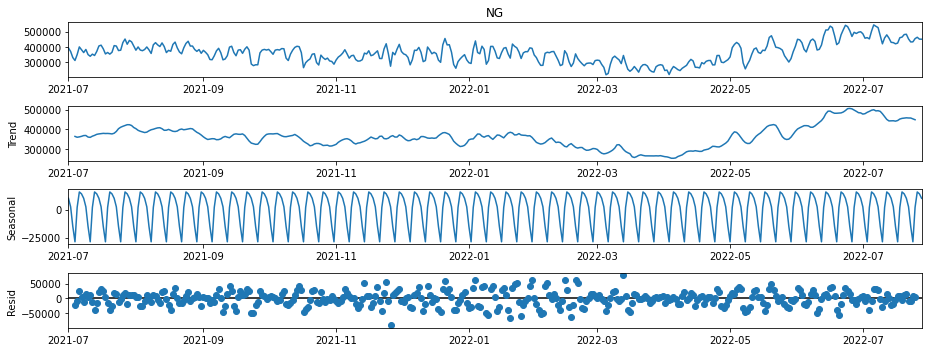

In [21]:
decomp = seasonal_decompose(df_gas)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [22]:
train_gas, test_gas = train_test_split(df_gas, test_size = 56, shuffle=False)

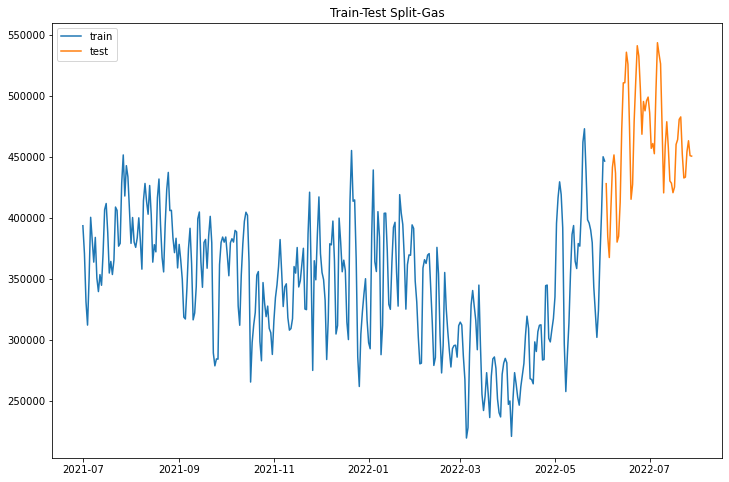

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_gas, label='train')
ax.plot(test_gas, label='test')
ax.set_title('Train-Test Split-Gas');
plt.legend();

### Conclusion:
- The model suggest that the time series is not stationary and will require differencing to make it stationary. 
- There is a seasonality of a week along with a steady trend that drops in Apr 2022 and increases drastically during June and July of 2022.

#### Oil

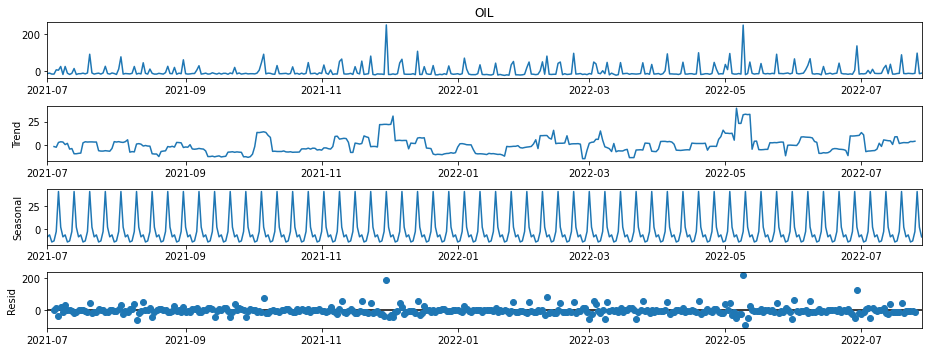

In [24]:
decomp = seasonal_decompose(df_oil)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [25]:
train_oil, test_oil = train_test_split(df_oil, test_size = 56, shuffle=False)

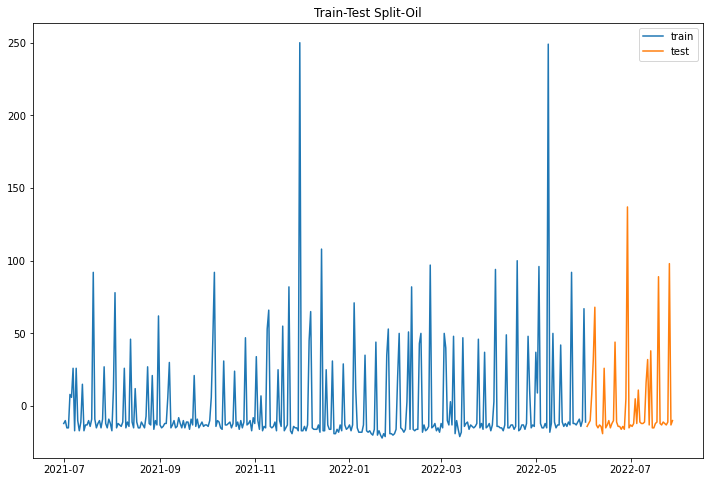

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_oil, label='train')
ax.plot(test_oil, label='test')
ax.set_title('Train-Test Split-Oil');
plt.legend();

### Conclusion:
- The model suggest that the time series is somewhat stationary and but may still require differencing. 
- There is a seasonality of a week along with a steady trend that is steady fluctuating and an observed that follows the same trend.

#### Sun

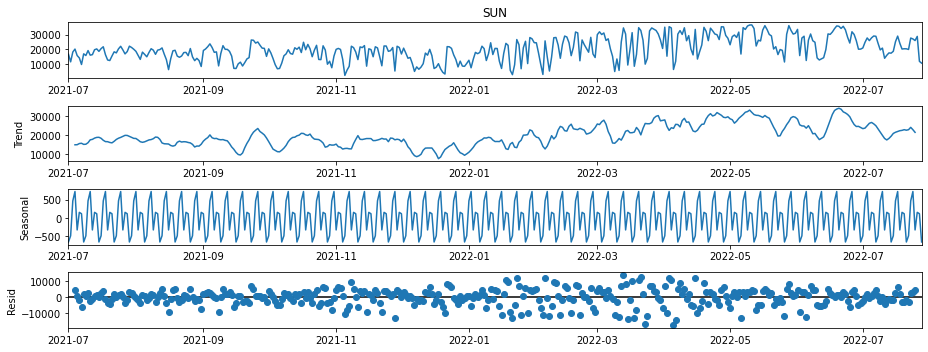

In [27]:
decomp = seasonal_decompose(df_sun)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [28]:
train_sun, test_sun = train_test_split(df_sun, test_size = 56, shuffle=False)

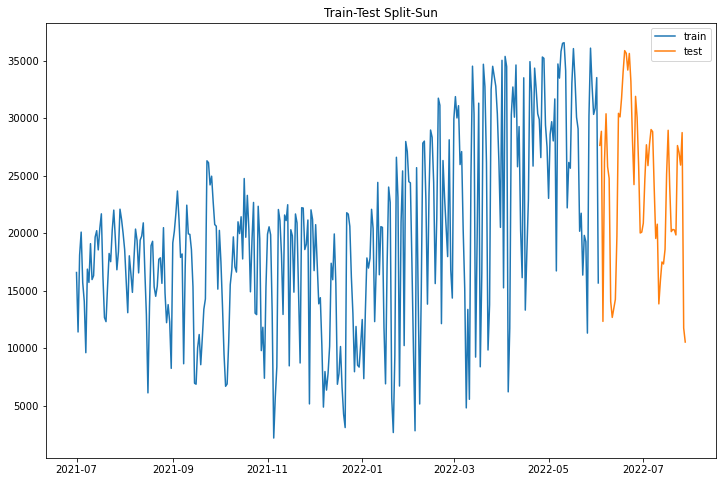

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_sun, label='train')
ax.plot(test_sun, label='test')
ax.set_title('Train-Test Split-Sun');
plt.legend();

### Conclusion:
- The model suggest that the time series is somewhat stationary and but may still require differencing. 
- There is a seasonality of a week.
- The trend is steady fluctuating with a big spike toward the later months and an observed that follows the same trend.

#### Hydro

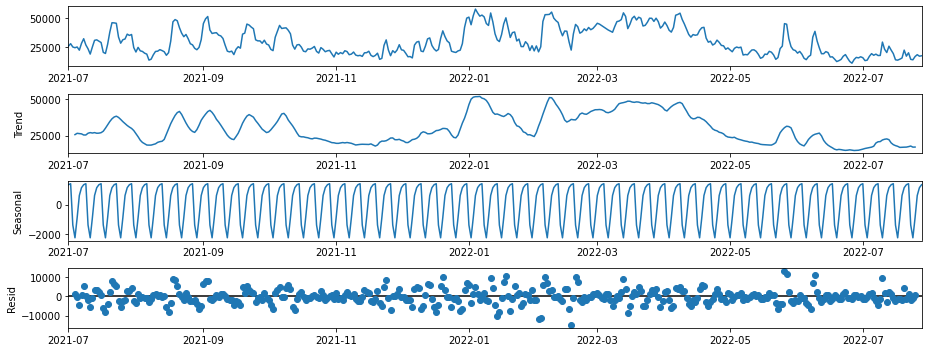

In [30]:
decomp = seasonal_decompose(df_hydro)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [31]:
train_hydro, test_hydro = train_test_split(df_hydro, test_size = 56, shuffle=False)

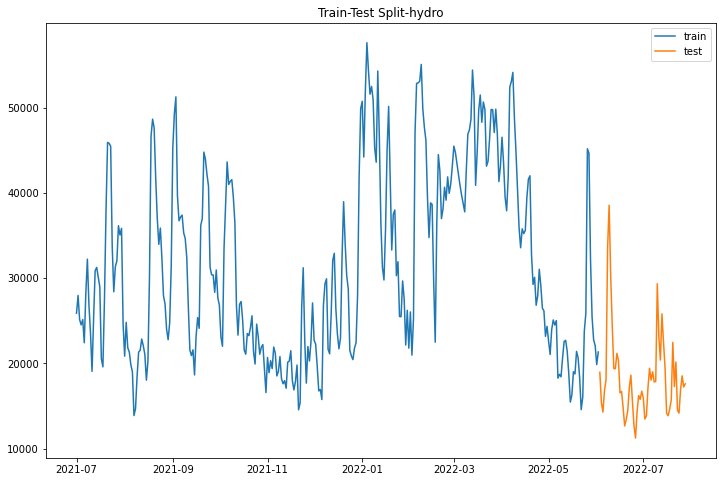

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_hydro, label='train')
ax.plot(test_hydro, label='test')
ax.set_title('Train-Test Split-hydro');
plt.legend();

### Conclusion:
- The model suggest that the time series is not stationary and will require differencing. 
- There is a seasonality of a week.
- The trend is fluctuating with a big spike toward the beginning and middle months and an observed that follows the same trend.

#### Nuclear

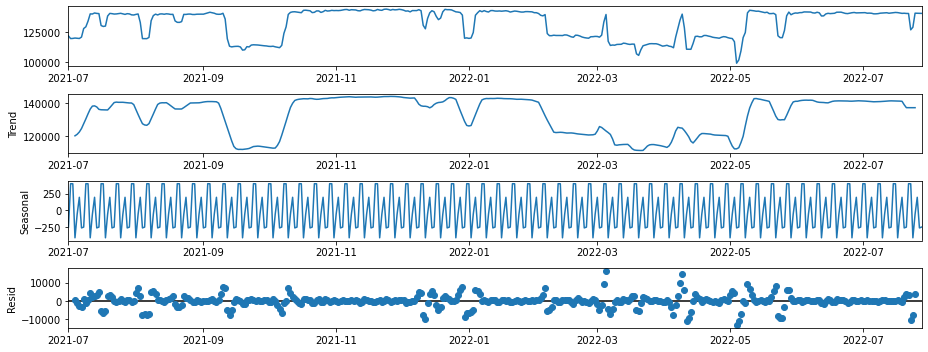

In [33]:
decomp = seasonal_decompose(df_nuc)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [34]:
train_nuc, test_nuc = train_test_split(df_nuc, test_size = 56, shuffle=False)

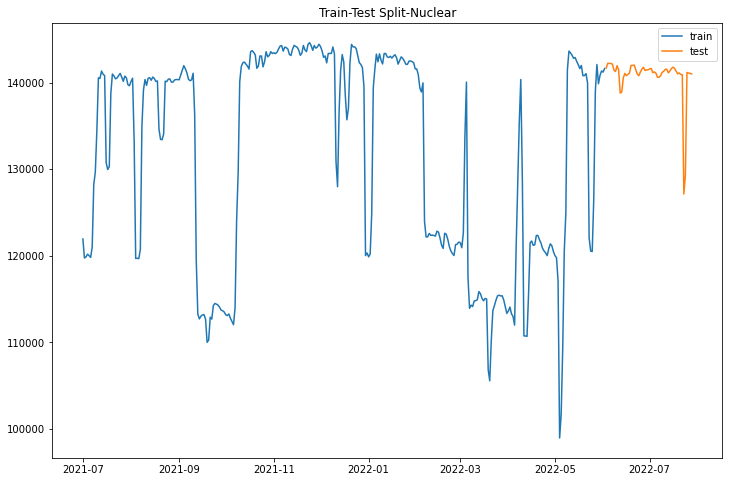

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_nuc, label='train')
ax.plot(test_nuc, label='test')
ax.set_title('Train-Test Split-Nuclear');
plt.legend();

### Conclusion:
- The model suggest that the time series is not stationary and will require differencing. 
- There is a seasonality of a week.
- The trend is fluctuating with a big spike toward the beginning, middle, and demand months with drastic drops in between. The observed follows a similar trend and the trend category.

#### Wind

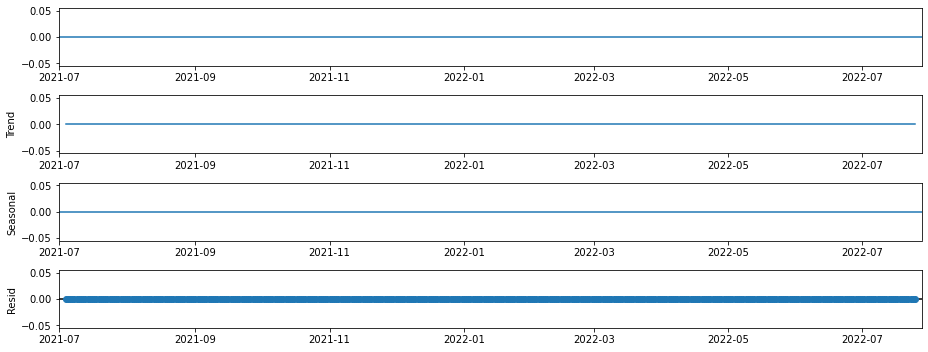

In [36]:
decomp = seasonal_decompose(df_wind)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [37]:
train_wind, test_wind = train_test_split(df_wind, test_size = 56, shuffle=False)

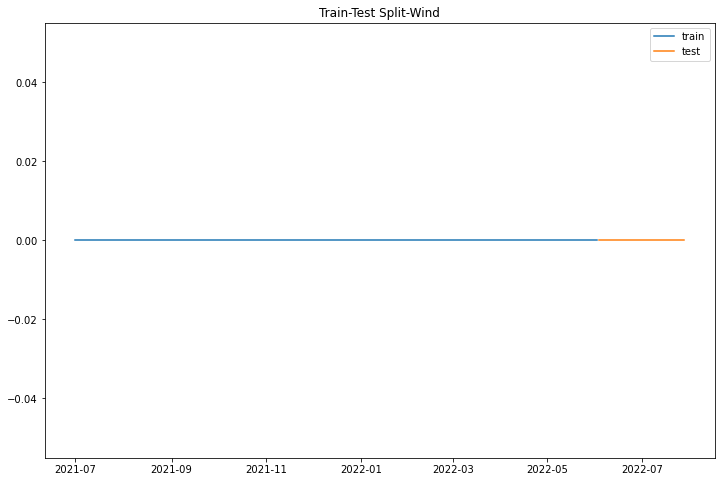

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_wind, label='train')
ax.plot(test_wind, label='test')
ax.set_title('Train-Test Split-Wind');
plt.legend();

### Conclusion:
- The model can't be used because of insufficient data (all the numbers are zero). There is no point in predicting wind. 

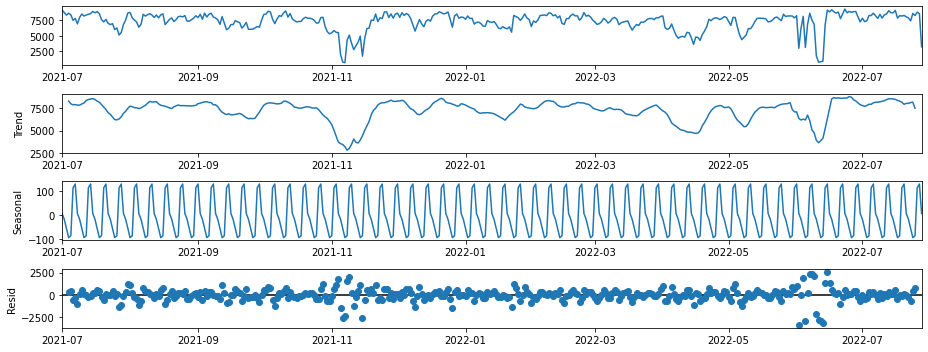

In [39]:
decomp = seasonal_decompose(df_oth)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

#### Other

In [40]:
train_oth, test_oth = train_test_split(df_oth, test_size = 56, shuffle=False)

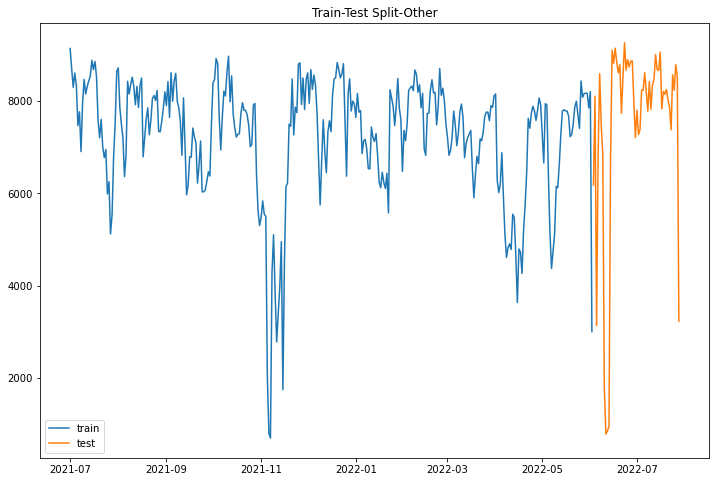

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_oth, label='train')
ax.plot(test_oth, label='test')
ax.set_title('Train-Test Split-Other');
plt.legend();

### Conclusion:
- The model suggest that the time series is not stationary and will require differencing. 
- There is a seasonality of a week.
- The trend shows a drop during three timeframes througout the year. 
- The observed follows a similar trend as the trend category.

#### Demand

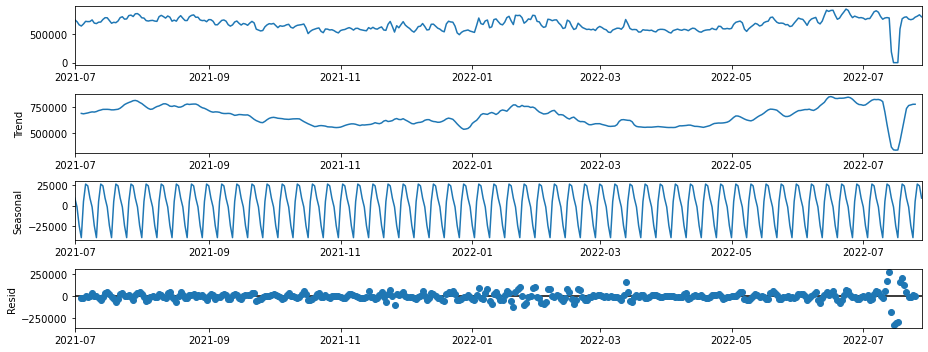

In [42]:
decomp = seasonal_decompose(df_dem)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [43]:
train_dem, test_dem = train_test_split(df_dem, test_size = 56, shuffle=False)

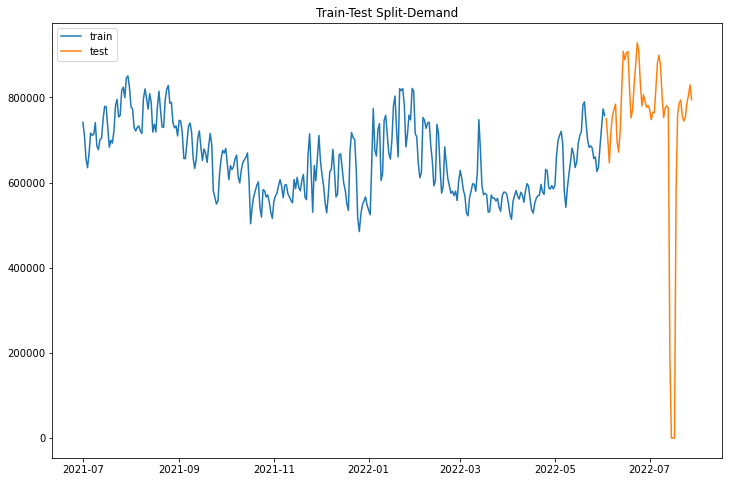

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_dem, label='train')
ax.plot(test_dem, label='test')
ax.set_title('Train-Test Split-Demand');
plt.legend();

### Conclusion:
- The model suggest that the time series is stationary given one drastic drop in demand.. 
- There is a seasonality of a week.
- The trend shows a drop during the demand drop timeframe at the later part of the year. 
- The observed follows a similar trend as the trend category.

# PMDArima and FBProphet
- I will be dropping wind from all future modeling because the values are all `0`
- I will then give the Arima models from above some differences to try pull better results.

In [45]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima import model_selection
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose, auto_arima
from pmdarima.arima.stationarity import ADFTest

In [46]:
from prophet import Prophet

C:\Users\FFF\anaconda3\envs\time\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### PMDArima Gas

In [47]:
# Checking stationarity
adf_test_gas = ADFTest()

adf_test_gas = ADFTest(alpha=0.05)
p_val_gas, should_diff_gas = adf_test_gas.should_diff(df_gas) 

print(f"P-Value: {p_val_gas}, so should you difference the data? {should_diff_gas}")

P-Value: 0.5482058552941115, so should you difference the data? True


In [48]:
arima_gas = auto_arima(train_gas,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=7873.830, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7942.285, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7930.688, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7925.885, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7940.295, Time=0.03 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=7872.433, Time=0.71 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=7876.104, Time=0.22 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=7873.627, Time=1.57 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=7872.980, Time=0.58 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=7875.625, Time=3.71 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=7886.997, Time=0.31 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=7916.623, Time=0.46 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=7873.600, Time=0.82 sec
 ARIMA(1,1,3)(0,0,1)[12] intercept   : AIC=7873.304, Time=1.07 sec
 ARIMA(0,1,3)(0,0,1

In [49]:
arima_gas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  337
Model:             SARIMAX(2, 1, 3)x(0, 0, [1], 12)   Log Likelihood               -3924.760
Date:                              Mon, 08 Aug 2022   AIC                           7863.520
Time:                                      13:54:37   BIC                           7890.239
Sample:                                           0   HQIC                          7874.171
                                              - 337                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4681      0.052     28.311      0.000       1.366       1.570
ar.L2         -0.5459      0.051    -10.620      0.000      -0.647      -0.445
ma.L1         -1.5265      0.047    -32.296      0.000      -1.619      -1.434
ma.L2          0.2267      0.078      2.915      0.004       0.074       0.379
ma.L3          0.3455      0.039      8.749      0.000       0.268       0.423
ma.S.L12      -0.1578      0.046     -3.444      0.001      -0.248      -0.068
sigma2      8.111e+08   6.52e-12   1.24e+20      0.000    8.11e+08    8.11e+08
===================================================================================
Ljung-Box (L1) (Q):                   3.08   Jarque-Bera (JB):                 8.57
Prob(Q):                              0.08   Prob(JB):                         0.01
Heteroskedasticity (H):               0.78   Skew:                             0.26
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.44e+37. Standard errors may be unstable.
"""

In [50]:
test_preds_gas = pd.Series(arima_gas.predict(n_periods=len(test_gas)), index=test_gas.index)

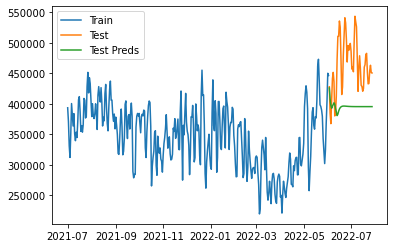

In [51]:
plt.plot(train_gas, label = 'Train')
plt.plot(test_gas, label = 'Test')
plt.plot(test_preds_gas, label = 'Test Preds')
plt.legend();

In [52]:
# Fit the best fit model from grid search SARIMAX(2, 1, 3)x(0, 0, 1, 12)
seas_arima_gas = ARIMA(train_gas,
                   order=(2, 1, 3),
                   seasonal_order=(0, 0, 1, 12))
res_sarima_gas = seas_arima_gas.fit()

# Print out summary information on the fit
print(res_sarima_gas.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 NG   No. Observations:                  337
Model:             ARIMA(2, 1, 3)x(0, 0, [1], 12)   Log Likelihood               -3924.760
Date:                            Mon, 08 Aug 2022   AIC                           7863.520
Time:                                    13:54:41   BIC                           7890.239
Sample:                                07-01-2021   HQIC                          7874.171
                                     - 06-02-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4681      0.052     28.311      0.000       1.366       1.570
ar.L2         -0.5459      0.051   

### FBProphet

In [53]:
Model_gas = Prophet(interval_width = 0.95)

In [54]:
train_gas_pr = train_gas.reset_index()
train_gas_pr
# resetting the index for the train_gas dataframe

,period,NG
0,2021-07-01,393574
1,2021-07-02,370842
2,2021-07-03,331165
3,2021-07-04,312014
4,2021-07-05,350574
...,...,...
332,2022-05-29,324109
333,2022-05-30,368909
334,2022-05-31,404136
335,2022-06-01,450210


In [55]:
train_gas_pr = train_gas_pr.rename(columns = {'period': 'ds', 'NG': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

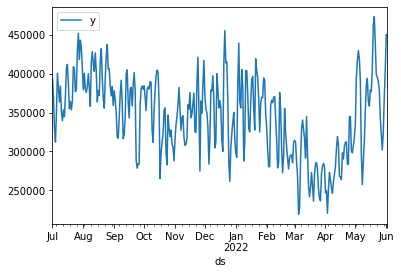

In [56]:
train_gas_pr.plot(y = 'y', x = 'ds')

In [57]:
Model_gas.fit(train_gas_pr)

13:54:42 - cmdstanpy - INFO - Chain [1] start processing
13:54:43 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
# Use a weekly freqency and periods of 8 (two months)
future_gas = Model_gas.make_future_dataframe(periods = 56, freq = 'D')

In [59]:
#Predict the future dates and values
results_gas = Model_gas.predict(df = future_gas)

results_gas.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
388,2022-07-24,406401.155447,305905.390224,458931.933048,394666.376983,417745.796146,-27328.456862,-27328.456862,-27328.456862,-27328.456862,-27328.456862,-27328.456862,0.0,0.0,0.0,379072.698585
389,2022-07-25,407259.319714,330788.108663,488500.133083,395237.666656,418946.648150,3939.542689,3939.542689,3939.542689,3939.542689,3939.542689,3939.542689,0.0,0.0,0.0,411198.862403
390,2022-07-26,408117.483980,341859.994929,500661.744410,395508.966412,420147.151358,16083.719497,16083.719497,16083.719497,16083.719497,16083.719497,16083.719497,0.0,0.0,0.0,424201.203478
391,2022-07-27,408975.648247,343372.413081,498831.799800,395743.590451,421344.245577,12662.450150,12662.450150,12662.450150,12662.450150,12662.450150,12662.450150,0.0,0.0,0.0,421638.098396
392,2022-07-28,409833.812513,340830.972563,492126.618985,396263.042247,422542.601322,8328.966410,8328.966410,8328.966410,8328.966410,8328.966410,8328.966410,0.0,0.0,0.0,418162.778923


In [60]:
results_gas[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-07-01,397593.332490,319891.862319,475720.570644
1,2021-07-02,390070.892959,316920.073400,467861.682563
2,2021-07-03,373937.565745,294680.082726,443984.777427
3,2021-07-04,361101.857646,287725.118582,436290.463974
4,2021-07-05,392091.840007,316607.598993,469035.020463
...,...,...,...,...
388,2022-07-24,379072.698585,305905.390224,458931.933048
389,2022-07-25,411198.862403,330788.108663,488500.133083
390,2022-07-26,424201.203478,341859.994929,500661.744410
391,2022-07-27,421638.098396,343372.413081,498831.799800


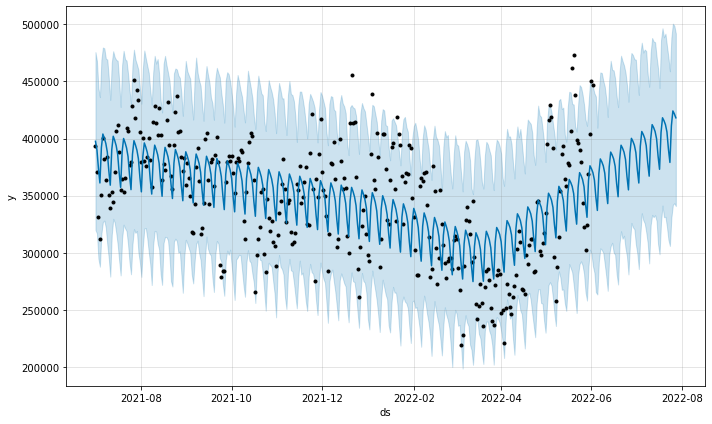

In [61]:
# plot the predictions
Model_gas.plot(results_gas);

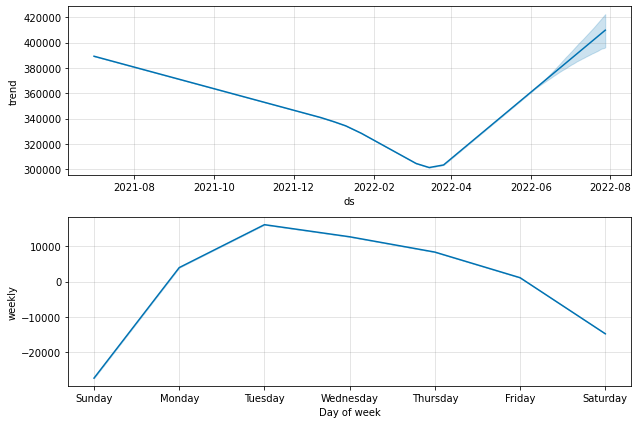

In [62]:
# Plot model components
Model_gas.plot_components(results_gas);

### Conclusion:

### PMDArima Oil

In [63]:
adf_test_oil = ADFTest()

adf_test_oil = ADFTest(alpha=0.05)
p_val_oil, should_diff_oil = adf_test_oil.should_diff(df_oil) 

print(f"P-Value: {p_val_oil}, so should you difference the data? {should_diff_oil}")

P-Value: 0.01, so should you difference the data? False


In [64]:
arima_oil = auto_arima(train_oil,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.46 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3311.612, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3313.008, Time=0.25 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3312.228, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3309.736, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=3311.973, Time=0.16 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=3311.544, Time=0.23 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=3310.760, Time=0.56 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3312.732, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=3312.413, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3305.933, Time=0.22 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=3307.017, Time=0.92 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3306.769, Time=1.34 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3306.300, Time=2.14 sec
 ARIMA(2,0,1)(0,0,0)[12]

In [65]:
arima_oil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  337
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -1624.704
Date:                Mon, 08 Aug 2022   AIC                           3261.407
Time:                        13:55:19   BIC                           3284.328
Sample:                             0   HQIC                          3270.543
                                - 337                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0665      0.083     12.863      0.000       0.904       1.229
ar.L2         -0.7761      0.102     -7.590      0.000      -0.976      -0.576
ar.L3         -0.1788      0.082     -2.182      0.029      -0.339      -0.018
ma.L1         -1.2336      0.021    -59.380      0.000      -1.274      -1.193
ma.L2          0.9793      0.021     45.921      0.000       0.938       1.021
sigma2       902.0073     28.979     31.126      0.000     845.209     958.806
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):              7979.34
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               2.71   Skew:                             3.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
test_preds_oil = pd.Series(arima_oil.predict(n_periods=len(test_oil)), index=test_oil.index)

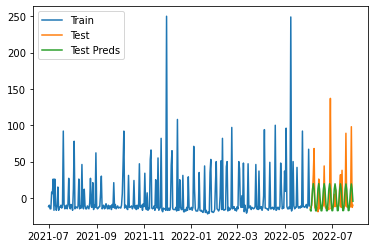

In [67]:
plt.plot(train_oil, label = 'Train')
plt.plot(test_oil, label = 'Test')
plt.plot(test_preds_oil, label = 'Test Preds')
plt.legend();

In [68]:
# Fit the best fit model from grid search SARIMAX(3, 0, 2)(0, 0, 0, 12)
seas_arima_oil = ARIMA(train_oil,
                   order=(3, 0, 2),
                   seasonal_order=(0, 0, 0, 12))
res_sarima_oil = seas_arima_oil.fit()

# Print out summary information on the fit
print(res_sarima_oil.summary())

C:\Users\FFF\anaconda3\envs\time\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\FFF\anaconda3\envs\time\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    OIL   No. Observations:                  337
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -1624.629
Date:                Mon, 08 Aug 2022   AIC                           3263.258
Time:                        13:55:20   BIC                           3289.999
Sample:                    07-01-2021   HQIC                          3273.917
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7095      2.417     -0.294      0.769      -5.446       4.027
ar.L1          1.0732      0.083     12.903      0.000       0.910       1.236
ar.L2         -0.7844      0.103     -7.638      0.0

C:\Users\FFF\anaconda3\envs\time\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### FBProphet Oil

In [69]:
Model_oil = Prophet(interval_width = 0.95)

In [70]:
train_oil_pr = train_oil.reset_index()
train_oil_pr
# resetting the index for the train_gas dataframe

,period,OIL
0,2021-07-01,-12
1,2021-07-02,-10
2,2021-07-03,-15
3,2021-07-04,-15
4,2021-07-05,8
...,...,...
332,2022-05-29,-9
333,2022-05-30,-14
334,2022-05-31,-10
335,2022-06-01,67


In [71]:
train_oil_pr = train_oil_pr.rename(columns = {'period': 'ds', 'OIL': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

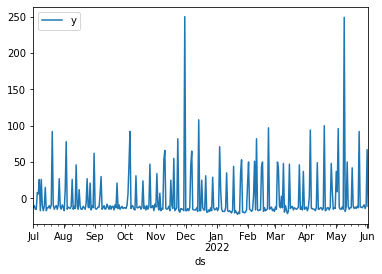

In [72]:
train_oil_pr.plot(y = 'y', x = 'ds')

In [73]:
Model_oil.fit(train_oil_pr)

13:55:21 - cmdstanpy - INFO - Chain [1] start processing
13:55:23 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
# Use a weekly freqency and periods of 8 (two months)
future_oil = Model_oil.make_future_dataframe(periods = 56, freq = 'D')

In [75]:
#Predict the future dates and values
results_oil = Model_oil.predict(df = future_oil)

results_oil.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
388,2022-07-24,3.667206,-63.233967,44.670210,3.666732,3.667623,-12.801081,-12.801081,-12.801081,-12.801081,-12.801081,-12.801081,0.0,0.0,0.0,-9.133874
389,2022-07-25,3.686694,-52.104775,51.220024,3.686206,3.687119,-1.954449,-1.954449,-1.954449,-1.954449,-1.954449,-1.954449,0.0,0.0,0.0,1.732245
390,2022-07-26,3.706182,-5.459672,100.237079,3.705683,3.706616,43.144149,43.144149,43.144149,43.144149,43.144149,43.144149,0.0,0.0,0.0,46.850330
391,2022-07-27,3.725669,-48.967811,56.147804,3.725156,3.726112,-0.762284,-0.762284,-0.762284,-0.762284,-0.762284,-0.762284,0.0,0.0,0.0,2.963385
392,2022-07-28,3.745157,-57.088234,47.694980,3.744631,3.745610,-8.751870,-8.751870,-8.751870,-8.751870,-8.751870,-8.751870,0.0,0.0,0.0,-5.006713


In [76]:
results_oil[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-07-01,-12.632795,-67.956150,44.592142
1,2021-07-02,-8.952169,-65.367509,44.823905
2,2021-07-03,-17.625878,-72.182188,34.143881
3,2021-07-04,-16.623738,-69.455928,36.445323
4,2021-07-05,-5.757684,-59.914463,42.482277
...,...,...,...,...
388,2022-07-24,-9.133874,-63.233967,44.670210
389,2022-07-25,1.732245,-52.104775,51.220024
390,2022-07-26,46.850330,-5.459672,100.237079
391,2022-07-27,2.963385,-48.967811,56.147804


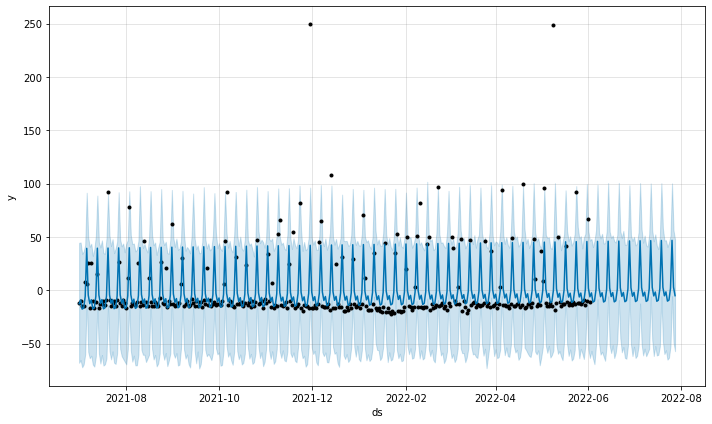

In [77]:
# plot the predictions
Model_oil.plot(results_oil);

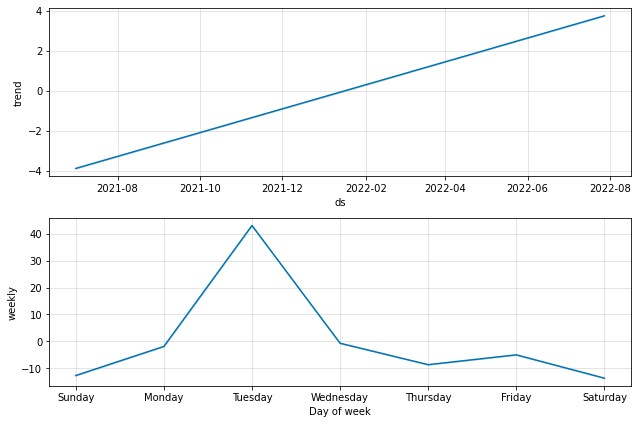

In [78]:
# Plot model components
Model_oil.plot_components(results_oil);

#### Conclusion:

### PMDArima Sun

In [79]:
adf_test_sun = ADFTest()

adf_test_sun = ADFTest(alpha=0.05)
p_val_sun, should_diff_sun = adf_test_sun.should_diff(df_sun) 

print(f"P-Value: {p_val_sun}, so should you difference the data? {should_diff_sun}")

P-Value: 0.01, so should you difference the data? False


In [80]:
arima_sun = auto_arima(train_sun,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=6831.428, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6936.989, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6923.754, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6878.858, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6934.991, Time=0.01 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=6829.723, Time=0.96 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=6828.490, Time=0.36 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=6829.754, Time=1.13 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=6826.578, Time=0.17 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=6827.860, Time=0.51 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=6827.830, Time=0.76 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=6829.546, Time=0.70 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6875.465, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=6827.976, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0

In [81]:
arima_sun.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  337
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -3410.130
Date:                Mon, 08 Aug 2022   AIC                           6826.259
Time:                        13:55:36   BIC                           6837.711
Sample:                             0   HQIC                          6830.824
                                - 337                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5119      0.050    -10.279      0.000      -0.610      -0.414
ma.L2         -0.4027      0.046     -8.700      0.000      -0.493      -0.312
sigma2      4.225e+07      4e-10   1.06e+17      0.000    4.22e+07    4.22e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.47
Prob(Q):                              1.00   Prob(JB):                         0.01
Heteroskedasticity (H):               4.04   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.76e+33. Standard errors may be unstable.
"""

In [82]:
test_preds_sun = pd.Series(arima_sun.predict(n_periods=len(test_sun)), index=test_sun.index)

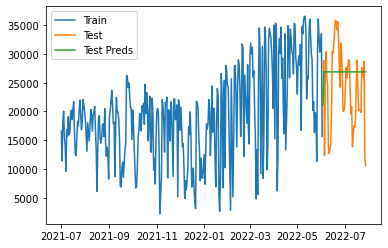

In [83]:
plt.plot(train_sun, label = 'Train')
plt.plot(test_sun, label = 'Test')
plt.plot(test_preds_sun, label = 'Test Preds')
plt.legend();

In [84]:
# Fit the best fit model from grid search SARIMAX(0, 1, 2)x(0, 0, 0, 12)
seas_arima_sun = ARIMA(train_sun,
                   order=(0, 1, 2),
                   seasonal_order=(0, 0, 0, 12))
res_sarima_sun = seas_arima_sun.fit()

# Print out summary information on the fit
print(res_sarima_sun.summary())

                               SARIMAX Results                                
Dep. Variable:                    SUN   No. Observations:                  337
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -3410.130
Date:                Mon, 08 Aug 2022   AIC                           6826.259
Time:                        13:55:37   BIC                           6837.711
Sample:                    07-01-2021   HQIC                          6830.824
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5119      0.050    -10.279      0.000      -0.610      -0.414
ma.L2         -0.4027      0.046     -8.700      0.000      -0.493      -0.312
sigma2      4.225e+07      4e-10   1.06e+17      0.0

### FBProphet Sun

In [85]:
Model_sun = Prophet(interval_width = 0.95)

In [86]:
train_sun_pr = train_sun.reset_index()
train_sun_pr
# resetting the index for the train_gas dataframe

,period,SUN
0,2021-07-01,16579
1,2021-07-02,11408
2,2021-07-03,18091
3,2021-07-04,20093
4,2021-07-05,15702
...,...,...
332,2022-05-29,32818
333,2022-05-30,30326
334,2022-05-31,30855
335,2022-06-01,33525


In [87]:
train_sun_pr = train_sun_pr.rename(columns = {'period': 'ds', 'SUN': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

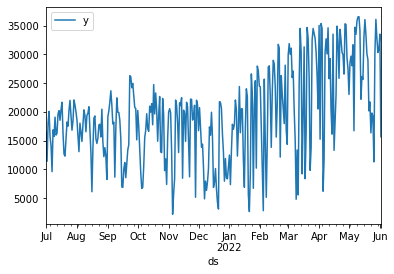

In [88]:
train_sun_pr.plot(y = 'y', x = 'ds')

In [89]:
Model_sun.fit(train_sun_pr)

13:55:38 - cmdstanpy - INFO - Chain [1] start processing
13:55:40 - cmdstanpy - INFO - Chain [1] done processing


In [90]:
# Use a weekly freqency and periods of 8 (two months)
future_sun = Model_sun.make_future_dataframe(periods = 56, freq = 'D')

In [91]:
#Predict the future dates and values
results_sun = Model_sun.predict(df = future_sun)

results_sun.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
388,2022-07-24,32704.047647,20782.928437,46397.797143,32238.958224,33176.939717,821.040390,821.040390,821.040390,821.040390,821.040390,821.040390,0.0,0.0,0.0,33525.088037
389,2022-07-25,32779.394883,18502.953643,46385.421860,32299.556909,33263.108333,-413.903168,-413.903168,-413.903168,-413.903168,-413.903168,-413.903168,0.0,0.0,0.0,32365.491715
390,2022-07-26,32854.742120,19168.890659,45836.567369,32358.079634,33349.215864,137.187875,137.187875,137.187875,137.187875,137.187875,137.187875,0.0,0.0,0.0,32991.929995
391,2022-07-27,32930.089356,19748.315830,45592.715382,32418.394578,33434.927288,-16.019079,-16.019079,-16.019079,-16.019079,-16.019079,-16.019079,0.0,0.0,0.0,32914.070277
392,2022-07-28,33005.436592,19523.422420,44912.857829,32480.837043,33520.990226,-803.432399,-803.432399,-803.432399,-803.432399,-803.432399,-803.432399,0.0,0.0,0.0,32202.004193


In [92]:
results_sun[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-07-01,15272.512423,2858.338608,29361.393350
1,2021-07-02,15720.976314,2601.915304,28060.635937
2,2021-07-03,16713.141522,3787.691183,28759.631708
3,2021-07-04,16904.087023,3609.481535,30000.015770
4,2021-07-05,15671.510736,2756.876216,27956.687107
...,...,...,...,...
388,2022-07-24,33525.088037,20782.928437,46397.797143
389,2022-07-25,32365.491715,18502.953643,46385.421860
390,2022-07-26,32991.929995,19168.890659,45836.567369
391,2022-07-27,32914.070277,19748.315830,45592.715382


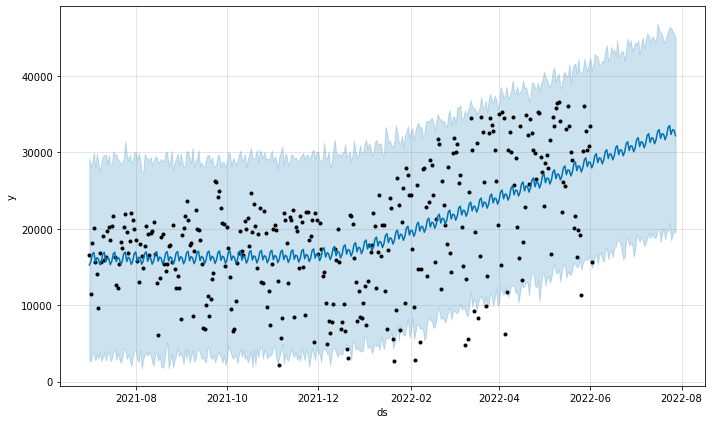

In [93]:
# plot the predictions
Model_sun.plot(results_sun);

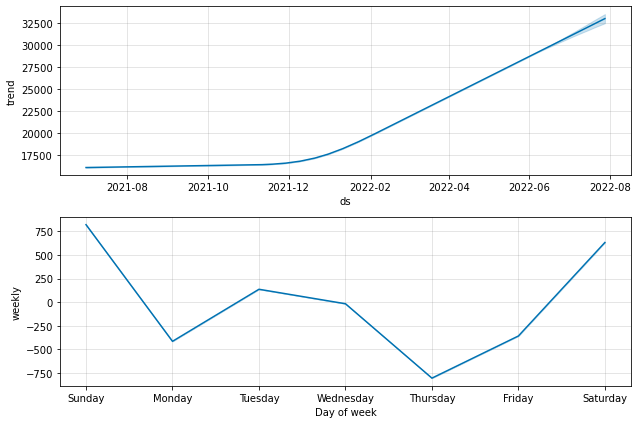

In [94]:
# Plot model components
Model_sun.plot_components(results_sun);

### Conclusion:

### PMDArima Hydro

In [95]:
adf_test_hydro = ADFTest()

adf_test_hydro = ADFTest(alpha=0.05)
p_val_hydro, should_diff_hydro = adf_test_hydro.should_diff(df_hydro) 

print(f"P-Value: {p_val_hydro}, so should you difference the data? {should_diff_hydro}")

P-Value: 0.03807238252497182, so should you difference the data? False


In [96]:
arima_hydro = auto_arima(train_hydro,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=6601.269, Time=1.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6650.966, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6632.909, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6622.178, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6648.970, Time=0.02 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=6601.280, Time=0.49 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=6601.135, Time=0.97 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=6600.438, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=6618.373, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=6621.136, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=6602.049, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=6601.655, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6622.127, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=6612.661, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0

In [97]:
arima_hydro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  337
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -3294.962
Date:                Mon, 08 Aug 2022   AIC                           6597.923
Time:                        13:55:53   BIC                           6613.192
Sample:                             0   HQIC                          6604.009
                                - 337                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7145      0.064     11.078      0.000       0.588       0.841
ma.L1         -0.4924      0.064     -7.643      0.000      -0.619      -0.366
ma.L2         -0.4002      0.045     -8.799      0.000      -0.489      -0.311
sigma2       1.98e+07   8.06e-10   2.46e+16      0.000    1.98e+07    1.98e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               107.89
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.80
Prob(H) (two-sided):                  0.22   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.78e+31. Standard errors may be unstable.
"""

In [98]:
test_preds_hydro = pd.Series(arima_hydro.predict(n_periods=len(test_hydro)), index=test_hydro.index)

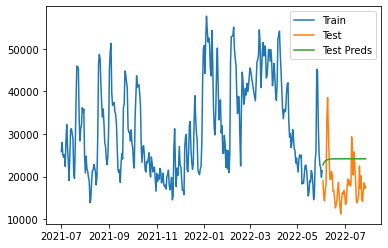

In [99]:
plt.plot(train_hydro, label = 'Train')
plt.plot(test_hydro, label = 'Test')
plt.plot(test_preds_hydro, label = 'Test Preds')
plt.legend();

In [100]:
# Fit the best fit model from grid search SARIMAX(1, 1, 2)x(0, 0, 0, 12)
seas_arima_hydro = ARIMA(train_sun,
                   order=(1, 1, 2),
                   seasonal_order=(0, 0, 0, 12))
res_sarima_hydro = seas_arima_hydro.fit()

# Print out summary information on the fit
print(res_sarima_hydro.summary())

                               SARIMAX Results                                
Dep. Variable:                    SUN   No. Observations:                  337
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3410.095
Date:                Mon, 08 Aug 2022   AIC                           6828.190
Time:                        13:55:53   BIC                           6843.458
Sample:                    07-01-2021   HQIC                          6834.276
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0073      0.124      0.059      0.953      -0.235       0.249
ma.L1         -0.5180      0.115     -4.514      0.000      -0.743      -0.293
ma.L2         -0.3973      0.098     -4.071      0.0

### FBProphet Hydro

In [101]:
Model_hydro = Prophet(interval_width = 0.95)

In [102]:
train_hydro_pr = train_hydro.reset_index()
train_hydro_pr
# resetting the index for the train_gas dataframe

,period,value
0,2021-07-01,25886
1,2021-07-02,27973
2,2021-07-03,25139
3,2021-07-04,24519
4,2021-07-05,25145
...,...,...
332,2022-05-29,25462
333,2022-05-30,22769
334,2022-05-31,22096
335,2022-06-01,19868


In [103]:
train_hydro_pr = train_hydro_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

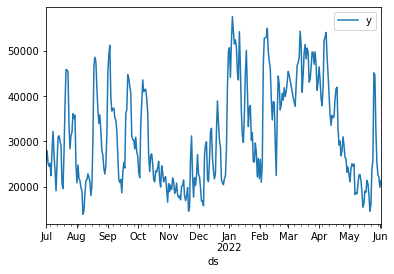

In [104]:
train_hydro_pr.plot(y = 'y', x = 'ds')

In [105]:
Model_hydro.fit(train_hydro_pr)

13:55:54 - cmdstanpy - INFO - Chain [1] start processing
13:55:56 - cmdstanpy - INFO - Chain [1] done processing


In [106]:
# Use a weekly freqency and periods of 8 (two months)
future_hydro = Model_hydro.make_future_dataframe(periods = 56, freq = 'D')

In [107]:
#Predict the future dates and values
results_hydro = Model_hydro.predict(df = future_hydro)

results_hydro.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
388,2022-07-24,21703.648709,705.737996,37463.198541,20141.036689,23244.873677,-2188.320731,-2188.320731,-2188.320731,-2188.320731,-2188.320731,-2188.320731,0.0,0.0,0.0,19515.327978
389,2022-07-25,21580.792550,1278.894407,40282.779909,19975.649614,23174.986152,-799.332226,-799.332226,-799.332226,-799.332226,-799.332226,-799.332226,0.0,0.0,0.0,20781.460323
390,2022-07-26,21457.936390,3746.702369,40780.141307,19798.685290,23104.797745,753.244171,753.244171,753.244171,753.244171,753.244171,753.244171,0.0,0.0,0.0,22211.180561
391,2022-07-27,21335.080230,2984.607012,41157.307142,19610.944476,23034.391431,748.156760,748.156760,748.156760,748.156760,748.156760,748.156760,0.0,0.0,0.0,22083.236990
392,2022-07-28,21212.224071,2495.005706,40020.188728,19465.435519,22956.497164,1003.020564,1003.020564,1003.020564,1003.020564,1003.020564,1003.020564,0.0,0.0,0.0,22215.244635


In [108]:
results_hydro[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-07-01,27994.476969,8949.965525,47072.879368
1,2021-07-02,28599.474521,7199.417054,47017.186720
2,2021-07-03,25937.445722,7808.067930,45169.855563
3,2021-07-04,24873.911646,6607.606244,42761.786463
4,2021-07-05,26286.492141,7450.011295,44995.345288
...,...,...,...,...
388,2022-07-24,19515.327978,705.737996,37463.198541
389,2022-07-25,20781.460323,1278.894407,40282.779909
390,2022-07-26,22211.180561,3746.702369,40780.141307
391,2022-07-27,22083.236990,2984.607012,41157.307142


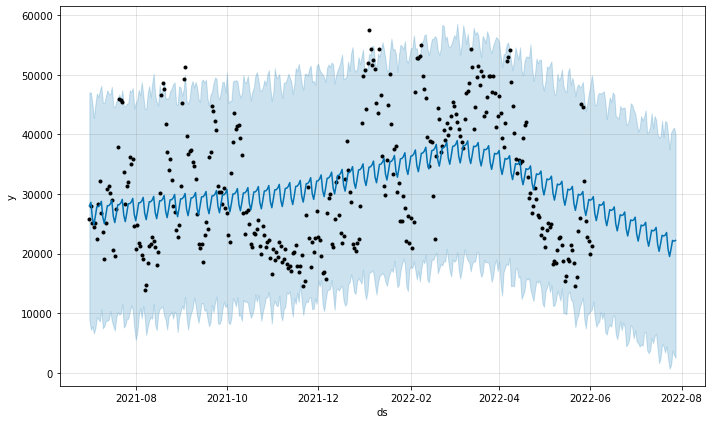

In [109]:
# plot the predictions
Model_hydro.plot(results_hydro);

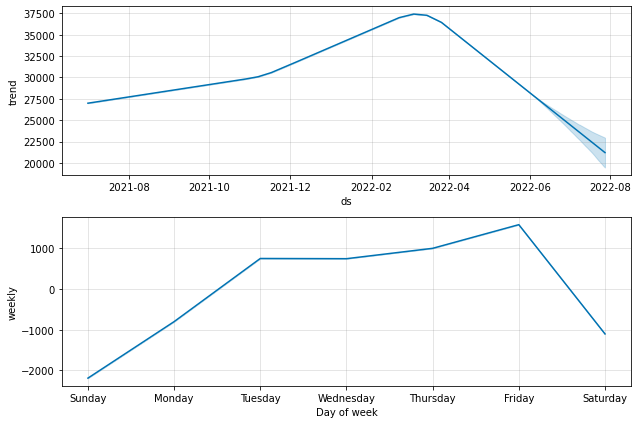

In [110]:
# Plot model components
Model_hydro.plot_components(results_hydro);

### Conclusion:

### PMDArima Nuclear

In [111]:
adf_test_nuc = ADFTest()

adf_test_nuc = ADFTest(alpha=0.05)
p_val_nuc, should_diff_nuc = adf_test_nuc.should_diff(df_nuc) 

print(f"P-Value: {p_val_nuc}, so should you difference the data? {should_diff_nuc}")

P-Value: 0.16207151984706464, so should you difference the data? True


In [112]:
arima_nuc = auto_arima(train_nuc,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=6546.238, Time=1.64 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6543.737, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6542.235, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6541.969, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6541.808, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=6545.615, Time=0.10 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=6545.615, Time=0.13 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=6547.593, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6540.354, Time=0.08 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=6542.235, Time=0.22 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=6544.202, Time=0.74 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=6542.211, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=6542.010, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6540.085, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0

In [113]:
arima_nuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  337
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3267.049
Date:                Mon, 08 Aug 2022   AIC                           6538.097
Time:                        13:56:05   BIC                           6545.731
Sample:                             0   HQIC                          6541.140
                                - 337                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0773      0.012      6.536      0.000       0.054       0.100
sigma2      1.524e+07   8.91e-13   1.71e+19      0.000    1.52e+07    1.52e+07
===================================================================================
Ljung-Box (L1) (Q):                  17.06   Jarque-Bera (JB):              1711.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.87   Skew:                            -1.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
test_preds_nuc = pd.Series(arima_nuc.predict(n_periods=len(test_nuc)), index=test_nuc.index)

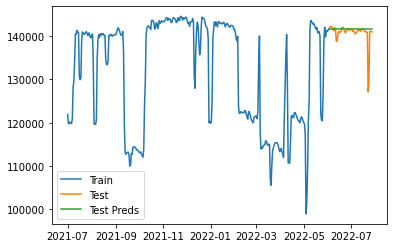

In [115]:
plt.plot(train_nuc, label = 'Train')
plt.plot(test_nuc, label = 'Test')
plt.plot(test_preds_nuc, label = 'Test Preds')
plt.legend();

In [116]:
# Fit the best fit model from grid search SARIMAX(0, 1, 1)x(0, 0, 0, 12)
seas_arima_nuc = ARIMA(train_nuc,
                   order=(0, 1, 1),
                   seasonal_order=(0, 0, 0, 12))
res_sarima_nuc = seas_arima_nuc.fit()

# Print out summary information on the fit
print(res_sarima_nuc.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  337
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3267.049
Date:                Mon, 08 Aug 2022   AIC                           6538.097
Time:                        13:56:06   BIC                           6545.731
Sample:                    07-01-2021   HQIC                          6541.140
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0773      0.012      6.536      0.000       0.054       0.100
sigma2      1.524e+07   8.91e-13   1.71e+19      0.000    1.52e+07    1.52e+07
Ljung-Box (L1) (Q):                  17.06   Jarque-

### FBProphet Nuclear

In [117]:
Model_nuc = Prophet(interval_width = 0.95)

In [118]:
train_nuc_pr = train_nuc.reset_index()
train_nuc_pr
# resetting the index for the train_gas dataframe

,period,value
0,2021-07-01,121935
1,2021-07-02,119733
2,2021-07-03,119861
3,2021-07-04,120176
4,2021-07-05,120006
...,...,...
332,2022-05-29,139858
333,2022-05-30,140818
334,2022-05-31,141335
335,2022-06-01,141204


In [119]:
train_nuc_pr = train_nuc_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

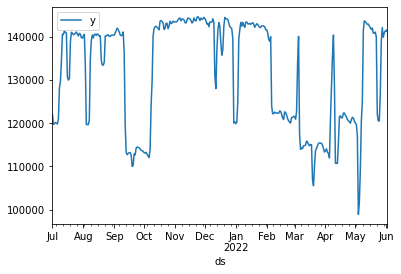

In [120]:
train_nuc_pr.plot(y = 'y', x = 'ds')

In [121]:
Model_nuc.fit(train_nuc_pr)

13:56:07 - cmdstanpy - INFO - Chain [1] start processing
13:56:08 - cmdstanpy - INFO - Chain [1] done processing


In [122]:
# Use a weekly freqency and periods of 8 (two months)
future_nuc = Model_nuc.make_future_dataframe(periods = 56, freq = 'D')

In [123]:
#Predict the future dates and values
results_nuc = Model_nuc.predict(df = future_nuc)

results_nuc.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
388,2022-07-24,144029.860816,125233.481033,162973.919569,137652.461262,151309.817090,-343.210963,-343.210963,-343.210963,-343.210963,-343.210963,-343.210963,0.0,0.0,0.0,143686.649853
389,2022-07-25,144240.162858,124912.123038,164000.794523,137679.432692,151695.953476,-129.056827,-129.056827,-129.056827,-129.056827,-129.056827,-129.056827,0.0,0.0,0.0,144111.106031
390,2022-07-26,144450.464899,124395.438444,164114.818358,137757.248793,152127.218103,287.604462,287.604462,287.604462,287.604462,287.604462,287.604462,0.0,0.0,0.0,144738.069362
391,2022-07-27,144660.766941,125865.659941,164620.303532,137847.976021,152523.789203,-188.286533,-188.286533,-188.286533,-188.286533,-188.286533,-188.286533,0.0,0.0,0.0,144472.480408
392,2022-07-28,144871.068983,125913.193861,164788.367969,137910.013893,152922.675016,-354.432654,-354.432654,-354.432654,-354.432654,-354.432654,-354.432654,0.0,0.0,0.0,144516.636329


In [124]:
results_nuc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-07-01,132650.828334,114429.842666,151883.286095
1,2021-07-02,133196.017874,115761.489549,151526.599771
2,2021-07-03,133519.303888,113675.912560,150908.624608
3,2021-07-04,132639.467297,115138.924690,150787.456064
4,2021-07-05,132846.093857,115771.800256,150346.428284
...,...,...,...,...
388,2022-07-24,143686.649853,125233.481033,162973.919569
389,2022-07-25,144111.106031,124912.123038,164000.794523
390,2022-07-26,144738.069362,124395.438444,164114.818358
391,2022-07-27,144472.480408,125865.659941,164620.303532


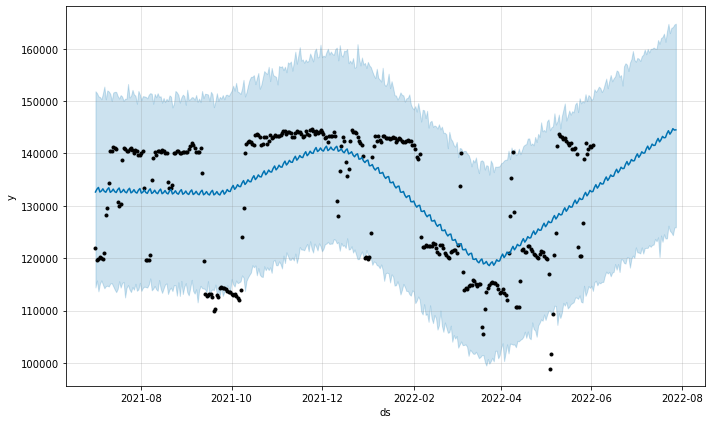

In [125]:
# plot the predictions
Model_nuc.plot(results_nuc);

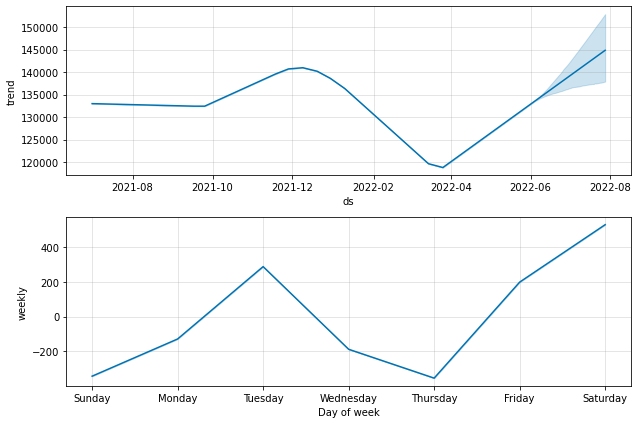

In [126]:
# Plot model components
Model_nuc.plot_components(results_nuc);

### Conclusion:

### PMDArima Other

In [127]:
adf_test_oth = ADFTest()

adf_test_oth = ADFTest(alpha=0.05)
p_val_oth, should_diff_oth = adf_test_oth.should_diff(df_oth) 

print(f"P-Value: {p_val_oth}, so should you difference the data? {should_diff_oth}")

P-Value: 0.01, so should you difference the data? False


In [128]:
arima_oth = auto_arima(train_oth,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=5417.128, Time=1.90 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5799.089, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=5412.602, Time=0.43 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5572.131, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=6958.164, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=5411.867, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=5412.612, Time=0.17 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=5414.573, Time=0.76 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=5413.545, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=5413.533, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=5571.658, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=5415.610, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 4.580 seconds


In [129]:
arima_oth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  337
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2702.934
Date:                Mon, 08 Aug 2022   AIC                           5411.867
Time:                        13:56:16   BIC                           5423.327
Sample:                             0   HQIC                          5416.435
                                - 337                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1149.5572    133.593      8.605      0.000     887.720    1411.394
ar.L1          0.8402      0.020     41.435      0.000       0.800       0.880
sigma2      5.383e+05   1.99e+04     27.012      0.000    4.99e+05    5.77e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):              1383.53
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                            -1.57
Prob(H) (two-sided):                  0.02   Kurtosis:                        12.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [130]:
test_preds_oth = pd.Series(arima_oth.predict(n_periods=len(test_oth)), index=test_oth.index)

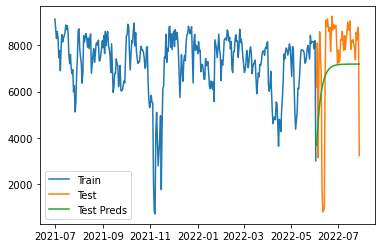

In [131]:
plt.plot(train_oth, label = 'Train')
plt.plot(test_oth, label = 'Test')
plt.plot(test_preds_oth, label = 'Test Preds')
plt.legend();

In [132]:
# Fit the best fit model from grid search SARIMAX(1, 0, 0)x(0, 0, 0, 12)
seas_arima_oth = ARIMA(train_oth,
                   order=(1, 0, 0),
                   seasonal_order=(0, 0, 0, 12))
res_sarima_oth = seas_arima_oth.fit()

# Print out summary information on the fit
print(res_sarima_oth.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  337
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2702.943
Date:                Mon, 08 Aug 2022   AIC                           5411.885
Time:                        13:56:17   BIC                           5423.346
Sample:                    07-01-2021   HQIC                          5416.453
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7226.9525    302.590     23.884      0.000    6633.887    7820.017
ar.L1          0.8413      0.020     41.460      0.000       0.802       0.881
sigma2      5.386e+05      2e+04     26.995      0.0

### FBProphet Other

In [133]:
Model_oth = Prophet(interval_width = 0.95)

In [134]:
train_oth_pr = train_oth.reset_index()
train_oth_pr
# resetting the index for the train_gas dataframe

,period,value
0,2021-07-01,9138
1,2021-07-02,8693
2,2021-07-03,8298
3,2021-07-04,8608
4,2021-07-05,8339
...,...,...
332,2022-05-29,8170
333,2022-05-30,8166
334,2022-05-31,7853
335,2022-06-01,8204


In [135]:
train_oth_pr = train_oth_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

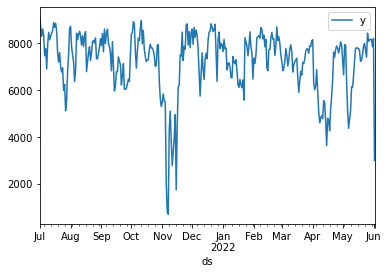

In [136]:
train_oth_pr.plot(y = 'y', x = 'ds')

In [137]:
Model_oth.fit(train_oth_pr)

13:56:18 - cmdstanpy - INFO - Chain [1] start processing
13:56:19 - cmdstanpy - INFO - Chain [1] done processing


In [138]:
# Use a weekly freqency and periods of 8 (two months)
future_oth = Model_oth.make_future_dataframe(periods = 56, freq = 'D')

In [139]:
#Predict the future dates and values
results_oth = Model_oth.predict(df = future_oth)

results_oth.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
388,2022-07-24,6886.386270,4477.922491,9572.165309,6861.701232,6911.303565,53.463516,53.463516,53.463516,53.463516,53.463516,53.463516,0.0,0.0,0.0,6939.849786
389,2022-07-25,6885.200935,4127.306831,9303.565549,6859.801840,6910.886409,-66.850310,-66.850310,-66.850310,-66.850310,-66.850310,-66.850310,0.0,0.0,0.0,6818.350624
390,2022-07-26,6884.015599,4375.200193,9435.599670,6857.902448,6910.469252,43.572867,43.572867,43.572867,43.572867,43.572867,43.572867,0.0,0.0,0.0,6927.588466
391,2022-07-27,6882.830263,4310.118714,9419.309768,6856.003056,6910.052096,14.844085,14.844085,14.844085,14.844085,14.844085,14.844085,0.0,0.0,0.0,6897.674348
392,2022-07-28,6881.644928,4305.457935,9336.802779,6854.104871,6909.634939,-54.636184,-54.636184,-54.636184,-54.636184,-54.636184,-54.636184,0.0,0.0,0.0,6827.008743


In [140]:
results_oth[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-07-01,7724.159420,5233.523575,10174.631788
1,2021-07-02,7811.019700,5417.715493,10229.805479
2,2021-07-03,7742.444753,5160.351018,10275.860870
3,2021-07-04,7818.526338,5247.699094,10153.999908
4,2021-07-05,7693.634917,5145.693005,10153.268677
...,...,...,...,...
388,2022-07-24,6939.849786,4477.922491,9572.165309
389,2022-07-25,6818.350624,4127.306831,9303.565549
390,2022-07-26,6927.588466,4375.200193,9435.599670
391,2022-07-27,6897.674348,4310.118714,9419.309768


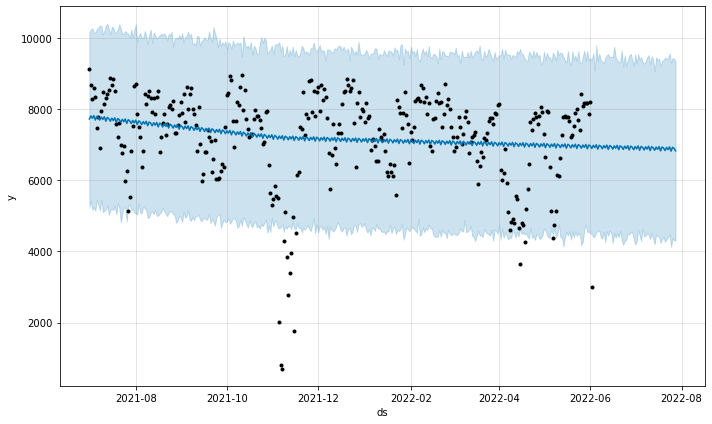

In [141]:
# plot the predictions
Model_oth.plot(results_oth);

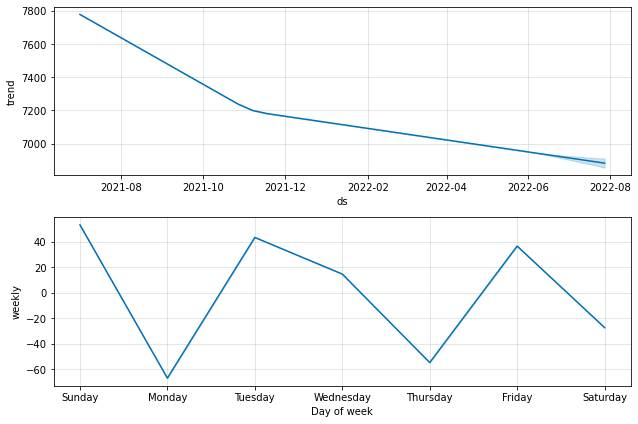

In [142]:
# Plot model components
Model_oth.plot_components(results_oth);

### Conclusion:

### PMDArima Demand

In [143]:
adf_test_dem = ADFTest()

adf_test_dem = ADFTest(alpha=0.05)
p_val_dem, should_diff_dem = adf_test_dem.should_diff(df_dem) 

print(f"P-Value: {p_val_dem}, so should you difference the data? {should_diff_dem}")

P-Value: 0.01, so should you difference the data? False


In [144]:
arima_dem = auto_arima(train_dem,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=8084.607, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8126.852, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8123.239, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8121.260, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8124.854, Time=0.02 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=8082.798, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=8084.457, Time=0.20 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=8084.534, Time=1.46 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=8082.985, Time=0.52 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=8086.525, Time=2.82 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=8086.918, Time=0.29 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=8112.058, Time=0.45 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=8084.615, Time=0.59 sec
 ARIMA(1,1,3)(0,0,1)[12] intercept   : AIC=8083.484, Time=1.06 sec
 ARIMA(0,1,3)(0,0,1

In [145]:
arima_dem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  337
Model:             SARIMAX(0, 1, 3)x(0, 0, [1], 12)   Log Likelihood               -4035.090
Date:                              Mon, 08 Aug 2022   AIC                           8080.180
Time:                                      13:56:48   BIC                           8099.266
Sample:                                           0   HQIC                          8087.788
                                              - 337                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0197      0.033      0.598      0.550      -0.045       0.084
ma.L2         -0.2805      0.018    -15.779      0.000      -0.315      -0.246
ma.L3         -0.1128      0.034     -3.317      0.001      -0.179      -0.046
ma.S.L12      -0.0703      0.032     -2.224      0.026      -0.132      -0.008
sigma2      1.449e+09   2.42e-12   5.99e+20      0.000    1.45e+09    1.45e+09
===================================================================================
Ljung-Box (L1) (Q):                   3.01   Jarque-Bera (JB):                38.40
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.47
Prob(H) (two-sided):                  0.35   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.49e+35. Standard errors may be unstable.
"""

In [146]:
test_preds_dem = pd.Series(arima_dem.predict(n_periods=len(test_dem)), index=test_dem.index)

In [147]:
test_dem.index[-1] 

Timestamp('2022-07-28 00:00:00', freq='D')

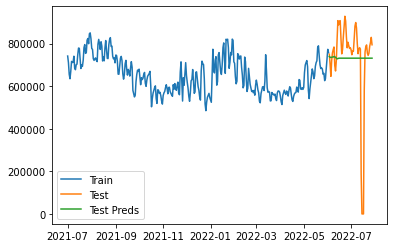

In [148]:
plt.plot(train_dem, label = 'Train')
plt.plot(test_dem, label = 'Test')
plt.plot(test_preds_dem, label = 'Test Preds')
plt.legend();

In [149]:
# Fit the best fit model from grid search SARIMAX(0, 1, 3)x(0, 0, 1, 12)
seas_arima_dem = ARIMA(train_dem,
                   order=(0, 1, 3),
                   seasonal_order=(0, 0, 1, 12))
res_sarima_dem = seas_arima_hydro.fit()

# Print out summary information on the fit
print(res_sarima_dem.summary())

                               SARIMAX Results                                
Dep. Variable:                    SUN   No. Observations:                  337
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3410.095
Date:                Mon, 08 Aug 2022   AIC                           6828.190
Time:                        13:56:48   BIC                           6843.458
Sample:                    07-01-2021   HQIC                          6834.276
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0073      0.124      0.059      0.953      -0.235       0.249
ma.L1         -0.5180      0.115     -4.514      0.000      -0.743      -0.293
ma.L2         -0.3973      0.098     -4.071      0.0

In [150]:
pd.date_range("2022-07-29", periods=len(test_dem), freq='D')

DatetimeIndex(['2022-07-29', '2022-07-30', '2022-07-31', '2022-08-01',
               '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
               '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09',
               '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13',
               '2022-08-14', '2022-08-15', '2022-08-16', '2022-08-17',
               '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21',
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
               '2022-09-03', '2022-09-04', '2022-09-05', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10',
               '2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16', '2022-09-17', '2022-09-18',
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22'],
     

### FBProphet Demand

In [180]:
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [175]:
Model_dem = Prophet(interval_width = 0.95)

In [176]:
train_dem_pr = train_dem.reset_index()
train_dem_pr
# resetting the index for the train_gas dataframe

,period,value
0,2021-07-01,741754
1,2021-07-02,711026
2,2021-07-03,655926
3,2021-07-04,635038
4,2021-07-05,670098
...,...,...
332,2022-05-29,635584
333,2022-05-30,684677
334,2022-05-31,727593
335,2022-06-01,773271


In [177]:
train_dem_pr = train_dem_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

In [181]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_dem_pr)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

14:23:01 - cmdstanpy - INFO - Chain [1] start processing
14:23:02 - cmdstanpy - INFO - Chain [1] done processing
14:23:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:23:02 - cmdstanpy - INFO - Chain [1] start processing
14:23:04 - cmdstanpy - INFO - Chain [1] done processing
14:23:27 - cmdstanpy - INFO - Chain [1] start processing
14:23:28 - cmdstanpy - INFO - Chain [1] done processing
14:23:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:23:28 - cmdstanpy - INFO - Chain [1] start processing
14:23:31 - cmdstanpy - INFO - Chain [1] done processing
14:23:53 - cmdstanpy - INFO - Chain [1] start processing
14:23:54 - cmdstanpy - INFO - Chain [1] done processing
14:23:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

    changepoint_prior_scale  seasonality_prior_scale           rmse
0                     0.001                     0.01   97554.101700
1                     0.001                     0.10   96794.019451
2                     0.001                     1.00   97068.475205
3                     0.001                    10.00   95320.300550
4                     0.010                     0.01   98455.608983
5                     0.010                     0.10   99237.489786
6                     0.010                     1.00   98647.986059
7                     0.010                    10.00   98880.200486
8                     0.100                     0.01  110232.723161
9                     0.100                     0.10  110039.822822
10                    0.100                     1.00  110094.555383
11                    0.100                    10.00  110284.021084
12                    0.500                     0.01  115943.988892
13                    0.500                     

In [182]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0}


In [183]:
Model_dem_2 = Prophet(interval_width = 0.95, changepoint_prior_scale = 0.001, seasonality_prior_scale = 10.0)

In [184]:
train_dem_pr = train_dem.reset_index()
train_dem_pr
# resetting the index for the train_gas dataframe

,period,value
0,2021-07-01,741754
1,2021-07-02,711026
2,2021-07-03,655926
3,2021-07-04,635038
4,2021-07-05,670098
...,...,...
332,2022-05-29,635584
333,2022-05-30,684677
334,2022-05-31,727593
335,2022-06-01,773271


In [185]:
train_dem_pr = train_dem_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

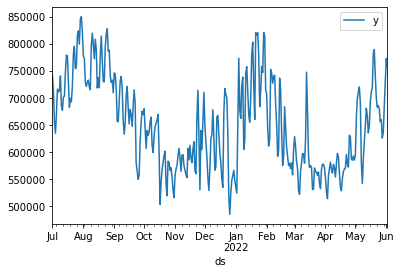

In [186]:
train_dem_pr.plot(y = 'y', x = 'ds');

In [187]:
Model_dem_2.fit(train_dem_pr)

14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:48 - cmdstanpy - INFO - Chain [1] done processing
14:36:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:48 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing


In [188]:
# Use a weekly freqency and periods of 8 (two months)
future_dem = Model_dem_2.make_future_dataframe(periods = 56, freq = 'D')

In [189]:
#Predict the future dates and values
results_dem = Model_dem_2.predict(df = future_dem)

results_dem.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
388,2022-07-24,580744.574314,406859.083908,690695.043655,580744.569574,580744.579161,-30666.426566,-30666.426566,-30666.426566,-30666.426566,-30666.426566,-30666.426566,0.0,0.0,0.0,550078.147748
389,2022-07-25,580420.347281,447274.667607,723099.379127,580420.342414,580420.352297,3000.895685,3000.895685,3000.895685,3000.895685,3000.895685,3000.895685,0.0,0.0,0.0,583421.242966
390,2022-07-26,580096.120248,451538.107862,737248.712197,580096.115254,580096.125408,19320.003414,19320.003414,19320.003414,19320.003414,19320.003414,19320.003414,0.0,0.0,0.0,599416.123662
391,2022-07-27,579771.893215,450026.335333,735676.161463,579771.888094,579771.898518,15113.435234,15113.435234,15113.435234,15113.435234,15113.435234,15113.435234,0.0,0.0,0.0,594885.328449
392,2022-07-28,579447.666182,437310.464358,723662.531353,579447.660934,579447.671629,9257.488029,9257.488029,9257.488029,9257.488029,9257.488029,9257.488029,0.0,0.0,0.0,588705.154211


In [190]:
results_dem[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-07-01,715802.151170,569236.422877,856324.474937
1,2021-07-02,707916.905398,558462.019744,847377.217399
2,2021-07-03,688174.343989,531532.220543,846155.588447
3,2021-07-04,674905.555475,512850.433494,816708.835139
4,2021-07-05,708248.650694,558552.822192,861448.651185
...,...,...,...,...
388,2022-07-24,550078.147748,406859.083908,690695.043655
389,2022-07-25,583421.242966,447274.667607,723099.379127
390,2022-07-26,599416.123662,451538.107862,737248.712197
391,2022-07-27,594885.328449,450026.335333,735676.161463


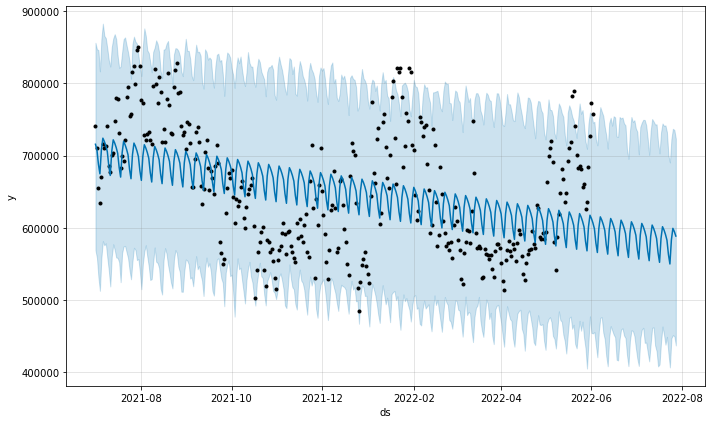

In [193]:
# plot the predictions
Model_dem_2.plot(results_dem);

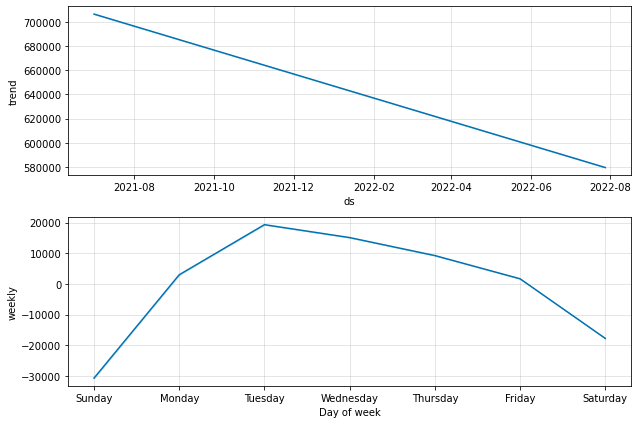

In [194]:
# Plot model components
Model_dem_2.plot_components(results_dem);

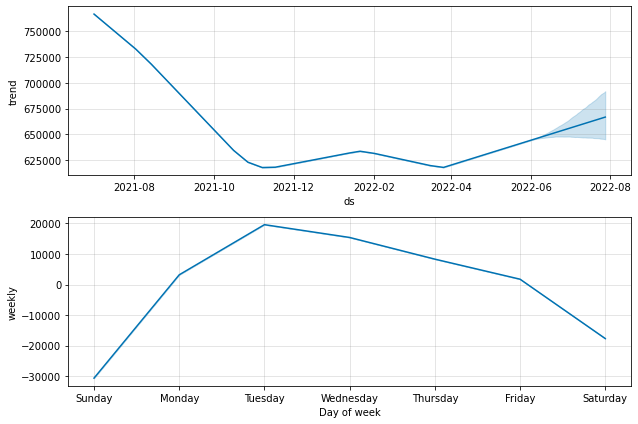

In [160]:
# Plot model components
Model_dem.plot_components(results_dem);